In [3]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial

In [4]:
def full_model_4vars(t, vars, params):
    alpha, beta, theta, phi, ep, delta, lam, m = params
    cA2, cS, cO, cM = vars

    cA = 2 * (1 - cA2) - lam * (cS + cM)
    dcA2dt = cO * cA - alpha * cM * cA2 - theta * cA2
    dcSdt = alpha/lam * cM * cA2 + theta/lam * cA2 - phi * cS - delta * (cS**m - cM)
    dcOdt = ep * (1 - cO * cA)
    dcMdt = delta * (cS**m - cM) - beta * cM

    return dcA2dt, dcSdt, dcOdt, dcMdt

def calc_all_full_model_4vars(sol, const, *params):
    """
    Receive the solution of the full model and return the values of cA2, cS_sum, cA, cO.
    """
    lam, m = const
    cA2, cS, cO, cM = sol.y
    cS_sum = cS + cM
    cA = 2 * (1 - cA2) - lam * (cS_sum)
    return cA2, cS_sum, cA, cO

In [59]:
params = np.array([20, 1, 0.6, 15, 1e3, 20])
consts = [0.17, 2]
init_cond = [0, 0, 0, 0]
full_model_4vars_dict = {'model': full_model_4vars, 'calc_all': calc_all_full_model_4vars,
            'info': '6 params: alpha, beta, theta, phi, ep, delta. 2 consts: lam, m, 4 vars: cA2, cS, cO, cM'}

model = oscillation(full_model_4vars_dict, params, consts, init_cond)

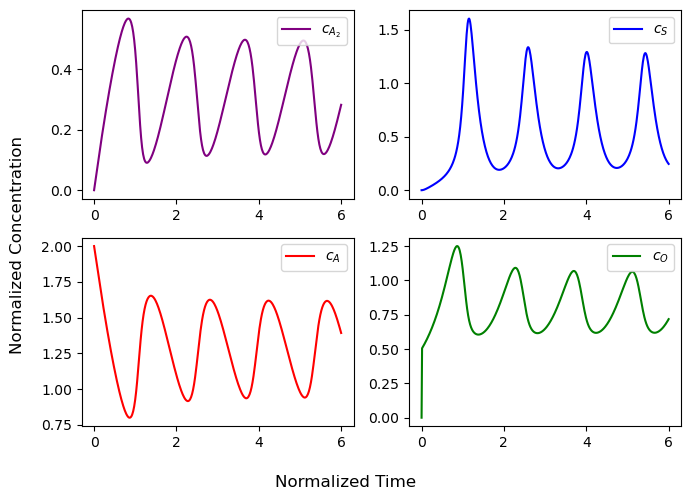

In [60]:
fig_osc, ax_osc = model.plot(t=6)

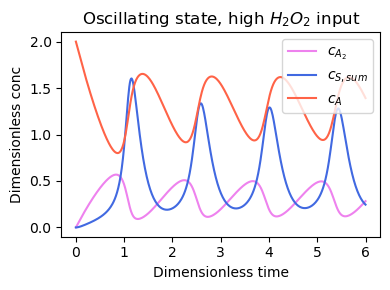

In [66]:
fig, ax = plt.subplots(figsize=(4,3))
t = ax_osc[0][0].lines[0].get_xdata()
ca2_osc = ax_osc[0][0].lines[0].get_ydata()
cS_osc = ax_osc[0][1].lines[0].get_ydata()
cA_osc = ax_osc[1][0].lines[0].get_ydata()
ax.plot(t, ca2_osc, c='violet', label='$c_{A_2}$')
ax.plot(t, cS_osc, c='royalblue', label='$c_{S,sum}$')
ax.plot(t, cA_osc, c='tomato', label='$c_A$')

ax.legend(loc=1)
ax.set_xlabel('Dimensionless time')
ax.set_ylabel('Dimensionless conc')
ax.set_title('Oscillating state, high $H_2O_2$ input')
fig.tight_layout()
fig.savefig('figs/osc.png', dpi=300)

In [71]:
params = np.array([20, 1, 0.6, 15, 1e3, 20])/0.2
consts = [0.17, 2]
init_cond = [0, 0, 0, 0]
full_model_4vars_dict = {'model': full_model_4vars, 'calc_all': calc_all_full_model_4vars,
            'info': '6 params: alpha, beta, theta, phi, ep, delta. 2 consts: lam, m, 4 vars: cA2, cS, cO, cM'}

model2 = oscillation(full_model_4vars_dict, params, consts, init_cond)

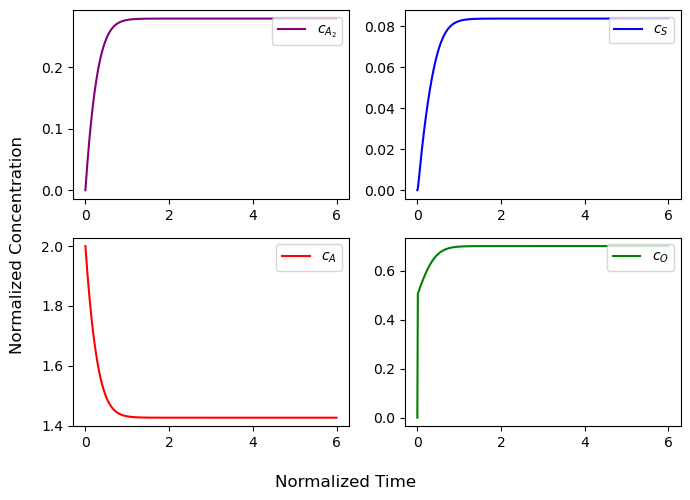

In [72]:
fig_std, ax_std = model2.plot(t=6)

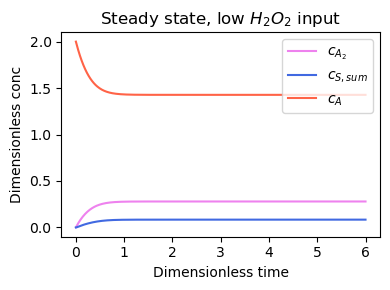

In [67]:
fig, ax = plt.subplots(figsize=(4,3))
t = ax_std[0][0].lines[0].get_xdata()
ca2_std = ax_std[0][0].lines[0].get_ydata()
cS_std = ax_std[0][1].lines[0].get_ydata()
cA_std = ax_std[1][0].lines[0].get_ydata()
ax.plot(t, ca2_std, c='violet', label='$c_{A_2}$')
ax.plot(t, cS_std, c='royalblue', label='$c_{S,sum}$')
ax.plot(t, cA_std, c='tomato', label='$c_A$')

ax.legend(loc=1)
ax.set_xlabel('Dimensionless time')
ax.set_ylabel('Dimensionless conc')
ax.set_title('Steady state, low $H_2O_2$ input')
fig.tight_layout()
fig.savefig('figs/std.png', dpi=300)

In [76]:
params = np.array([20, 1, 0.6, 15, 1e3, 20])/20
consts = [0.17, 2]
init_cond = [0, 0, 0, 0]
full_model_4vars_dict = {'model': full_model_4vars, 'calc_all': calc_all_full_model_4vars,
            'info': '6 params: alpha, beta, theta, phi, ep, delta. 2 consts: lam, m, 4 vars: cA2, cS, cO, cM'}

model3 = oscillation(full_model_4vars_dict, params, consts, init_cond)

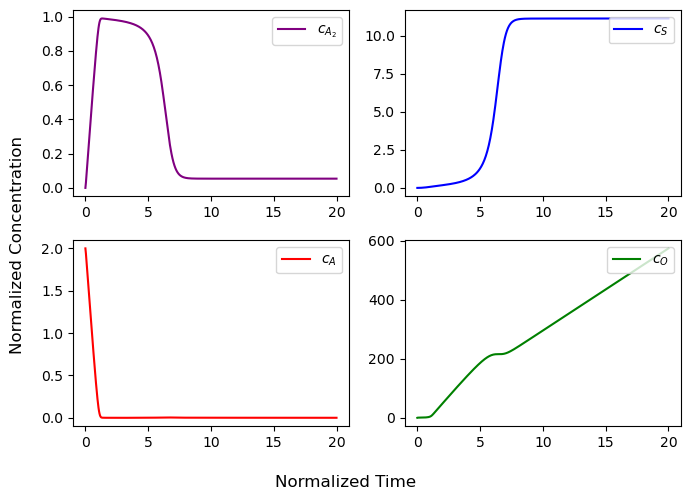

In [80]:
fig_std2, ax_std2 = model3.plot(t=20)

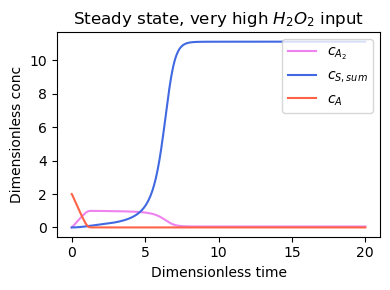

In [82]:
fig, ax = plt.subplots(figsize=(4,3))
t = ax_std2[0][0].lines[0].get_xdata()
ca2_std2 = ax_std2[0][0].lines[0].get_ydata()
cS_std2 = ax_std2[0][1].lines[0].get_ydata()
cA_std2 = ax_std2[1][0].lines[0].get_ydata()
ax.plot(t, ca2_std2, c='violet', label='$c_{A_2}$')
ax.plot(t, cS_std2, c='royalblue', label='$c_{S,sum}$')
ax.plot(t, cA_std2, c='tomato', label='$c_A$')

ax.legend(loc=1)
ax.set_xlabel('Dimensionless time')
ax.set_ylabel('Dimensionless conc')
ax.set_title('Steady state, very high $H_2O_2$ input')
fig.tight_layout()
fig.savefig('figs/std2.png', dpi=300)

In [57]:
def delayed_full_model_4vars(delays):
    td1, td2 = delays
    alpha, beta, theta, phi, ep, delta, lam, m = symbols(
        'alpha beta theta phi epsilon delta lam m')
    
    cA = 2 * (1 - y(0)) - lam * (y(1) + y(3))
    
    dcA2dt = y(2) * cA - alpha * y(0) * y(3, t-td2) - theta * y(0)
    dcSdt = alpha/lam * y(0) * y(3, t-td2) + theta/lam * y(0) - phi * y(1) - delta * (y(1)**m - y(3))
    dcOdt = ep * (1 - y(2) * cA)
    dcMdt = delta * (y(1)**m - y(3)) - beta * y(3, t-td1)

    dde = jitcdde([dcA2dt, dcSdt, dcOdt, dcMdt], control_pars=[
                  alpha, beta, theta, phi, ep, delta, lam, m])
    return dde

def calc_all_delayed_full_model_4vars(sol, consts, *params):
    lam, m = consts
    cA2 = sol[:, 0]
    cS = sol[:, 1]
    cO = sol[:, 2]
    cM = sol[:, 3]
    cA = 2 * (1 - cA2) - lam * (cS + cM)
    return np.array([cA2, cS + cM, cA, cO])

delayed_full_model_4vars_dict = {'model': delayed_full_model_4vars, 'calc_all': calc_all_delayed_full_model_4vars,
            'info': '6 params: alpha, beta, theta, phi, ep, delta. 2 consts: lam, m, 4 vars: cA2, cS, cO, cM'}

In [61]:
#DMAP 2 mol%
k1 = 1
k2 = 1

#parameters
rs_ac, rds_ac, rs, rds, ro, rm = 163.8, 40, 2.5, 265, 1e4, 1e2
rext = 12.6

delays = 0.2, 0.2
params = np.array([rs_ac, rds_ac, rs, rds, ro, rm])/rext
consts = [0.11, 2]
init_cond = [1, 0, 0, 0]
delayed_model = delayed_oscillation(delayed_full_model_4vars_dict, delays, params, consts, init_cond)

In [64]:
delayed_model.interactive_plot(ran=50, t=8)

interactive(children=(FloatSlider(value=16.55, description='alpha', max=66.55, step=0.05), FloatSlider(value=3…